In [ ]:
import os,sys
sys.path.append('./../../../open_AR_Sandbox/')
sys.path.append('./../../../gempy-1.16/')
import sandbox.sandbox as sb
import matplotlib.pyplot as plt 
import numpy
import numpy as np
import pandas as pd
import pykinect2
import panel as pn
import matplotlib
pn.extension()
from bokeh.plotting import figure, show, output_file
import cv2
from cv2 import aruco
import scipy.spatial.distance as cdist

In [ ]:
calib = sb.CalibrationData(file = 'daniel_aruco_calibration.json')
kinect = sb.KinectV2(calib)

#sensor = sb.DummySensor(calib, depth_limits=(500,2000))
sensor = sb.KinectV2(calib)
projector = sb.Projector(calib)
module = sb.CalibModule(calib, sensor, projector)
auto = sb.AutomaticModule(calib, sensor, projector)
marker = auto.marker

In [ ]:
to_pd = calib.aruco_corners

In [ ]:
to_pd

In [ ]:
pd.read_json(to_pd)

In [ ]:
marker.find_markers_rgb(amount = 4)
marker.plot_aruco_location('RGB')

In [ ]:
data = marker.rgb_markers
data

In [ ]:
calib.save_corners(data)

In [ ]:
c = calib.aruco_corners

In [ ]:
pd.read_json(c)

In [ ]:
a = loc.to_json()
calib.aruco_corners = a

In [ ]:
marker.kinect.calib.aruco_corners

In [ ]:
calib.aruco_corners

In [ ]:
calib.aruco_corners

In [ ]:
calib.save_json(file = 'daniel_aruco_calibration.json')

In [ ]:
calib.load_json( file = 'daniel_aruco_calibration.json' )

In [ ]:
marker.find_markers_projector(amount = 5)
marker.plot_aruco_location('Projector')



In [ ]:
module.calibrate()

In [ ]:
auto.marker.find_markers_rgb(amount=5)

In [ ]:
auto.marker.rgb_markers

In [ ]:
auto.calib.p_frame_left

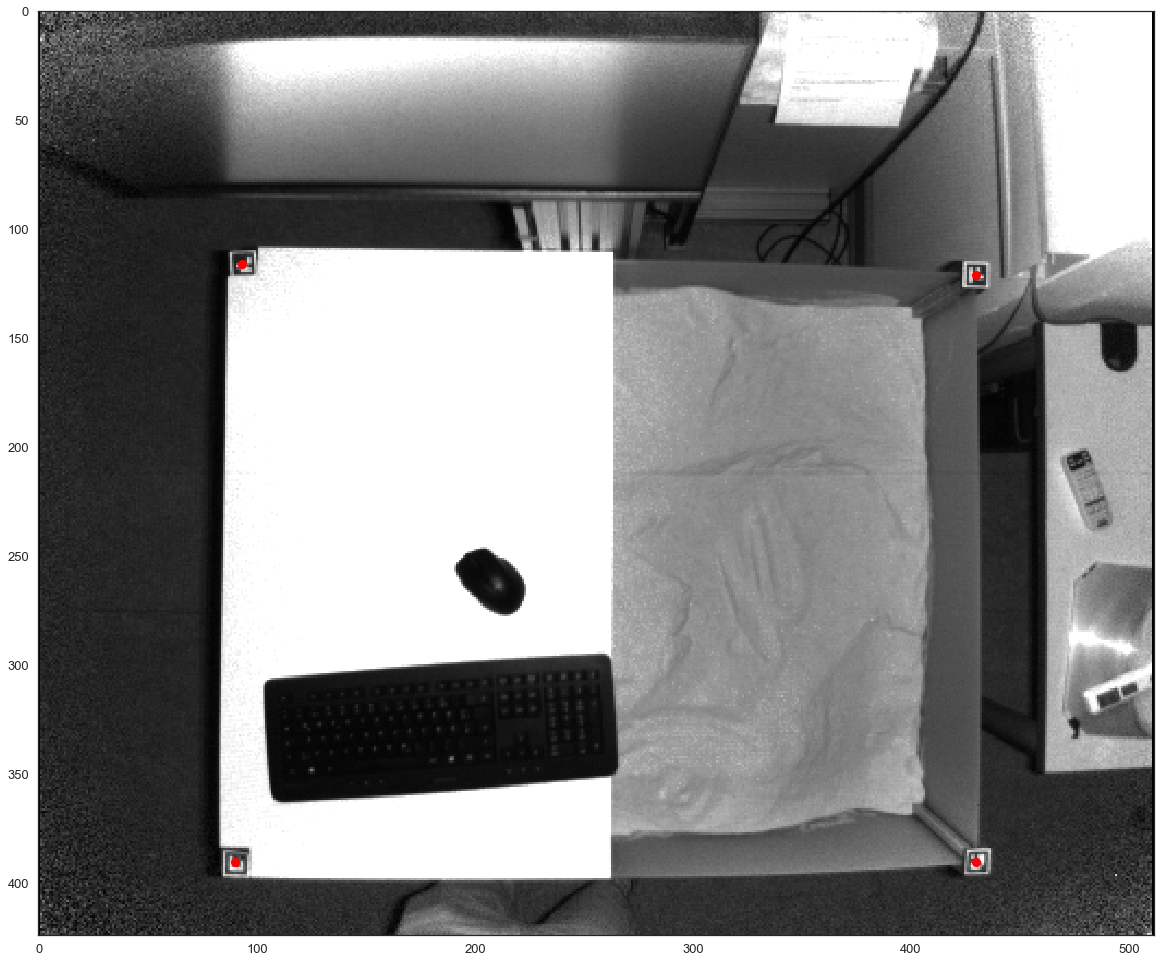

In [20]:
marker.find_markers_projector(amount = 5)

In [22]:
b= int(a.loc[a.ids == 20].Corners_projector_y.values)

,Corners_IR_y,Corners_IR_x,Corners_RGB_x,Corners_RGB_y
ids,,,,
1,NaN,NaN,868,540
5,390,430,1520,1027
10,390,90,521,1040
11,116,93,528,238
13,121,430,1500,239


In [ ]:
b

In [ ]:
a = marker.projector_markers.reset_index(drop = True)

In [ ]:
auto.move_leftupper_corner()

In [ ]:
calb.

In [ ]:
%debug

In [ ]:
x_r = marker.rgb_markers.Corners_RGB_x.loc[2]

In [ ]:
marker.projector_markers

In [ ]:
df=marker.create_CoordinateMap()

In [ ]:
df

In [ ]:
marker.find_markers_rgb(amount = 4)


In [ ]:
marker.find_markers_projector(amount = 5)

In [ ]:
474-337

In [ ]:
marker.plot_aruco_location('RGB')

In [ ]:
marker.plot_aruco_location('Projector')

In [ ]:
a= np.asarray(marker.corner_middle)
a

In [ ]:
1250-1172

In [ ]:
673-587

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(kinect.get_color())
plt.plot(a[:,0],a[:,1], 'ro')

In [ ]:
print(a[:,0].max(), a[:,1].max())

In [ ]:
marker.rgb_markers.Corners_RGB_x.loc[2]

In [ ]:
proj = marker.convert_color_to_depth('Proj', ids = 2)
rgb = marker.convert_color_to_depth('Real', ids = 2)

In [ ]:
proj

In [ ]:
pixel_scale1 = (box_width- left) / (frame_width)
pixel_scale2 = (box_height - bottom) / (frame_height)

pixel_size1 = box_width / frame_width
pixel_size2 = box_height / frame_height

In [ ]:
print(calib.p_frame_width, calib.p_frame_height)
print(calib.box_width, calib.box_height)

In [ ]:
rgb = marker.rgb_markers.reset_index().loc[rgb['ids']==2]
proj = marker.projector_markers.reset_index()

In [ ]:
rgb2 = rgb.loc[rgb['ids']==2]
proj2 = proj.loc[proj['ids']==2]
diference_color = rgb2.Corners_RGB_x.values-proj2.Corners_projector_x.values

In [ ]:
rgb

In [ ]:
mape = marker.CoordinateMap

In [ ]:
d = mape.loc[(mape['Color_x']==int(rgb2.Corners_RGB_x.values)) | (mape['Color_y']==int(rgb2.Corners_RGB_y.values))]

In [ ]:
mape

In [ ]:
mape.Color_y.ravel()

In [ ]:
mape['Color_x']

In [ ]:
a = mape['Color_x']
a

In [ ]:
dist = np.abs(a-int(rgb2.Corners_RGB_x.values))

In [ ]:
temp = np.argsort(dist)

In [ ]:
sorted_dist = a[temp]

In [ ]:
d.loc[temp[0]]

In [ ]:
b  = mape['Color_y']

In [ ]:
distb = np.abs(a-int(rgb2.Corners_RGB_x.values))

In [ ]:
ls = mape[['Color_x','Color_y']]

In [ ]:
ls

In [ ]:
distancia = dist.cdist([np.array([int(rgb2.Corners_RGB_x.values),int(rgb2.Corners_RGB_y.values)])], ls)
distancia

In [ ]:
sorted_val = np.argsort(distancia)[:][0]
sorted_val

In [ ]:
mape.loc[sorted_val[0]]

In [ ]:
def convert_color_to_depth(strg, ids):
    if strg == 'Proj':
        rgb = marker.projector_markers.reset_index()
        rgb2 = rgb.loc[rgb['ids'] == ids]
        x_rgb = int(rgb2.Corners_projector_x.values)
        y_rgb = int(rgb2.Corners_projector_y.values)
        
    elif strg == 'Real':
        rgb = marker.rgb_markers.reset_index()
        rgb2 = rgb.loc[rgb['ids'] == ids]
        x_rgb = int(rgb2.Corners_RGB_x.values)
        y_rgb = int(rgb2.Corners_RGB_y.values)
        
        
    
    color_data = marker.CoordinateMap[['Color_x','Color_y']]

    distance = dist.cdist([[x_rgb,y_rgb]], color_data)
    sorted_val = numpy.argsort(distance)[:][0]
    value = marker.CoordinateMap.loc[sorted_val[0]]
    
    return value

In [ ]:
projected_aruco2 = convert_color_to_depth('Proj', 2)
real_aruco2 = convert_color_to_depth('Real', 2)

In [ ]:
projected_aruco2

In [ ]:
real_aruco2

In [ ]:
print(296-140, 'Actual = 651', 'set to:', 651 - 156  )

In [ ]:
print(176-132, 'Actual = 170')

In [ ]:
marker.plot_rgb_aruco_location()

In [ ]:
marker.find_markers_ir(amount = 1)

In [ ]:
marker.plot_ir_aruco_location()

In [ ]:
marker.update_dict_markers_current()

In [ ]:
a = np.arange (1,11)
b = np.arange (1,20,2)

marker.

In [ ]:
plt.plot(a,b)
plt.axis('off')

In [ ]:
b

In [ ]:
a=pykinect2.PyKinectV2._ColorSpacePoint(100)

In [ ]:
a.x

In [ ]:
rgb


In [ ]:
proj

In [ ]:
proj_new = proj.reset_index()

In [ ]:
rgb_new = rgb.reset_index()

In [ ]:
rgb_new.loc[rgb_new['ids'] == 2]

In [ ]:
proj_new.loc[proj_new['ids'] == 2]

In [ ]:
y_r=int(rgb_new.loc[rgb_new['ids'] == 2]['Corners_RGB_y'])
x_r =int(rgb_new.loc[rgb_new['ids'] == 2]['Corners_RGB_x'])

In [ ]:
y_p =int(proj_new.loc[proj_new['ids'] == 2]['Corners_RGB_y'])
x_p =int(proj_new.loc[proj_new['ids'] == 2]['Corners_RGB_x'])


In [ ]:
y_r-y_p

In [ ]:
point = pykinect2.PyKinectV2._DepthSpacePoint(10,20)

In [ ]:
a=kinect.device._mapper.MapDepthPointToColorSpace(point,200)
b=kinect.device._mapper.MapDepthPointToCameraSpace(point,200)

In [ ]:
a.y

In [ ]:
b.z

In [ ]:
x = np.arange(0,kinect.get_frame().shape[1])
y = np.arange(0,kinect.get_frame().shape[0])
xx, yy = np.meshgrid(x,y)
xy_points = np.vstack([xx.ravel(),yy.ravel()]).T

In [ ]:
depth = kinect.get_frame()
depth_x = []
depth_y = []
depth_z = []
color_x = []
color_y = []
for i in range (len (xy_points)):
    x_point = xy_points[i,0]
    y_point = xy_points[i,1]
    z_point = depth[y_point][x_point]
    if z_point != 0:
        point = pykinect2.PyKinectV2._DepthSpacePoint(x_point,y_point)
        res = kinect.device._mapper.MapDepthPointToColorSpace(point,z_point)
        if res.y > 0:
            depth_x.append(x_point)
            depth_y.append(y_point)
            depth_z.append(z_point)
            color_x.append(int(res.x))
            color_y.append(int(res.y))
            
df = pd.DataFrame({'Depth_x':depth_x,
                   'Depth_y':depth_y,
                   'Depth_Z':depth_z,
                   'Color_x':color_x,
                   'Color_y':color_y})

In [ ]:
dep = pykinect2.PyKinectV2._DepthSpacePoint(100,100)
a=kinect.device._mapper.MapDepthPointToCameraSpace(dep,300)
a.y

In [ ]:
np.array([depth_x],[depth_y])

In [ ]:
df = pd.DataFrame({'Depth_x':depth_x,
                   'Depth_y':depth_y,
                   'Depth_Z':depth_z,
                   'Color_x':color_x,
                   'Color_y':color_y})

In [ ]:
df['Color_x'].min()

In [ ]:
labels = {'Depth_x','Depth_y', 'Color_x', 'Color_y'}
df = pd.DataFrame(columns = labels)

In [ ]:
df

In [ ]:
color_x = []
color_y = []
x_point = xy_points[1650,0]
y_point = xy_points[1650,1]
z_point = depth[y_point][x_point]
point = pykinect2.PyKinectV2._DepthSpacePoint(x_point,y_point)
res = kinect.device._mapper.MapDepthPointToColorSpace(point,z_point)
np.append(color_x,int(res.x))
np.append(color_y, int(res.y))

In [ ]:
res.